# <b>Question 2 - Edge Detection</b>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

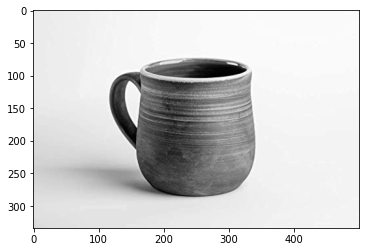

In [2]:
#Load image
cup = cv2.imread("images/cup.jpg",0)
plt.imshow(cup,cmap='gray')

## <b>Part 1 & 2</b>

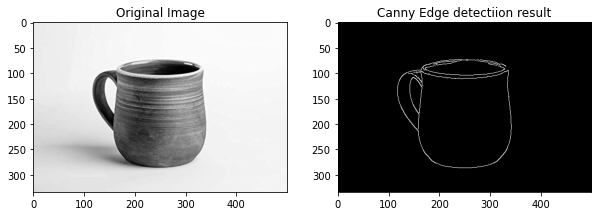

In [3]:
#Applying canny edge detection
c = np.copy(cup)
cannyCup = cv2.Canny(c, 100, 580)
fig, axs = plt.subplots(1, 2,figsize=(10,10))
axs[0].imshow(cup, cmap='gray')
axs[0].title.set_text('Original Image',)
axs[1].imshow(cannyCup, cmap='gray')
axs[1].title.set_text('Canny Edge detectiion result',)

Best values are obtained for minVal = 100, maxVal =580

## <b>Part 3</b>

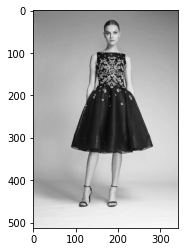

In [4]:
#Load image
girl = cv2.imread("images/girl.jpg",0)
plt.imshow(girl,cmap='gray')

In [5]:
## 3x3 Filters

#Prewitt filter
MxP = [[-1,0,1],
       [-1,0,1],
       [-1,0,1]]
MyP = [[1,1,1],
       [0,0,0],
       [-1,-1,-1]]
#Sobel filter
MxS = [[-1,0,1],
       [-2,0,2],
       [-1,0,1]]
MyS = [[1,2,1],
       [0,0,0],
       [-1,-2,-1]]
#Robert filter
MxR = [[0, 1],
       [-1,0]]
MyR = [[1, 0],
       [0,-1]]
#Laplacian filter
ML1 = [[0,1,0],
       [1,-4,1],
       [0,1,0]]
ML2 = [[1,1,1],
       [1,-8,1],
       [1,1,1]]
MxP = np.array(MxP)
MyP = np.array(MyP)
MxS = np.array(MxS)
MyS = np.array(MyS)
MxR = np.array(MxR)
MyR = np.array(MyR)
ML1 = np.array(ML1)
ML2 = np.array(ML1)

In [6]:
def padding(pic,k):
    #Padding
    #Number of row/columns needed for padding is floor(k/2)
    padNum = math.floor(k/2)
#     print(padNum)
    # 2k extra rows and columns are needed to accomodate both sides
    padPic = np.zeros((pic.shape[0]+(2*padNum),pic.shape[1]+(2*padNum)))
#     print(padPic.shape)
    padPic[padNum:padPic.shape[0]-padNum, padNum:padPic.shape[1]-padNum] = pic
    # Image will start from (padNum,padNum)
    xStart = padNum
    xEnd = padPic.shape[0]-padNum
    yStart = padNum
    yEnd = padPic.shape[1]-padNum
#     print(pic.shape)
    padPic[xStart:xEnd, yStart:yEnd] = pic
#     plt.imshow(padPic,cmap='gray')
    return padPic

In [43]:
def filt(img,ker,k):
    r = img.shape[0]
    c = img.shape[1]
    imgP = padding(img,k)
    out = np.zeros_like(imgP)
    padNum = k//2
    xS = padNum
    xE = imgP.shape[0] - padNum
    yS = padNum
    yE = imgP.shape[1] - padNum
    for i in range(xS,xE):
        for j in range(yS,yE):
            KxS = i - padNum
            KxE = i + padNum
            KyS = j - padNum
            KyE = j + padNum
            imgK = imgP[KxS:KxE+1,KyS:KyE+1]
            val = sum(sum(imgK*ker))
            out[i,j] = max(0,val)
    out = out[xS:xE,yS:yE]
    return out.astype('int')

In [48]:
PrewittX = filt(girl,MxP,3)
PrewittY = filt(girl,MyP,3)
Prewitt = np.int64(np.sqrt(PrewittX**2 + PrewittY**2))
SobelX = filt(girl,MxS,3)
SobelY = filt(girl,MyS,3)
Sobel = np.int64(np.sqrt(SobelX**2 + SobelY**2))
RobertX = filt(girl,MxP,2)
RobertY = filt(girl,MyP,2)
Robert = np.int64(np.sqrt(RobertX**2 + RobertY**2))
Laplacian1 = filt(girl,ML1,3)
Laplacian2 = filt(girl,ML2,3)

In [52]:
print(np.max(Laplacian1))
print(np.min(Laplacian1))
print(Laplacian1)

571
0
[[0 0 0 ... 0 0 0]
 [0 1 2 ... 0 0 0]
 [0 1 2 ... 0 0 0]
 ...
 [0 0 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


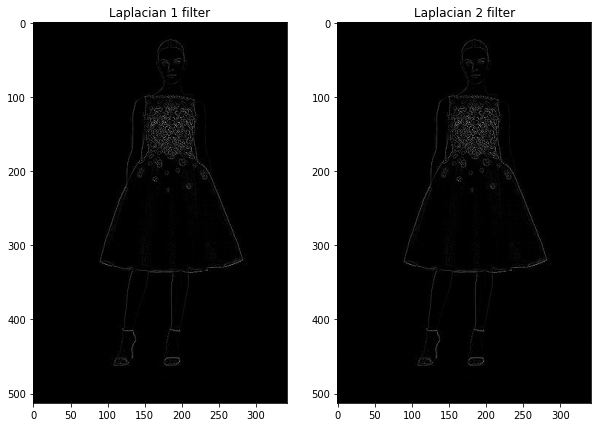

In [56]:
fig, axs = plt.subplots(1, 2,figsize=(10,10))
axs[0].imshow(Laplacian1,cmap='gray')
axs[0].title.set_text('Laplacian 1 filter')
axs[1].imshow(Laplacian2,cmap='gray')
axs[1].title.set_text('Laplacian 2 filter')

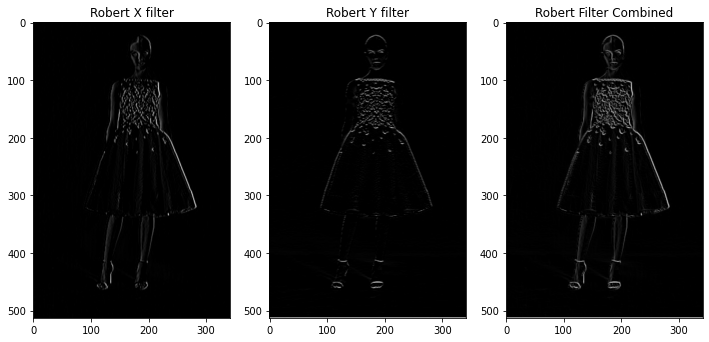

In [57]:
fig, axs = plt.subplots(1, 3,figsize=(12,12))
axs[0].imshow(RobertX,cmap='gray')
axs[0].title.set_text('Robert X filter')
axs[1].imshow(RobertY,cmap='gray')
axs[1].title.set_text('Robert Y filter')
axs[2].imshow(Robert,cmap='gray')
axs[2].title.set_text('Robert Filter Combined')

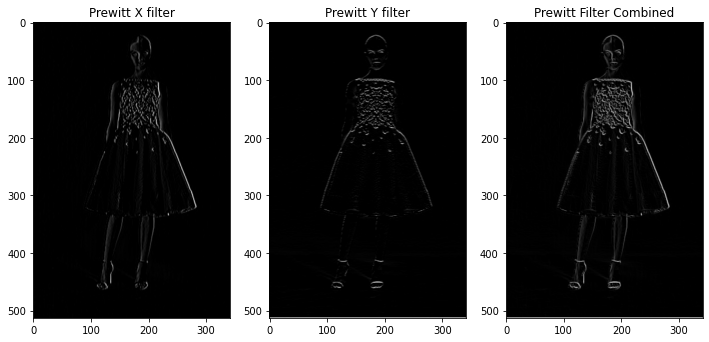

In [58]:
fig, axs = plt.subplots(1, 3,figsize=(12,12))
axs[0].imshow(PrewittX,cmap='gray')
axs[0].title.set_text('Prewitt X filter')
axs[1].imshow(PrewittY,cmap='gray')
axs[1].title.set_text('Prewitt Y filter')
axs[2].imshow(Prewitt,cmap='gray')
axs[2].title.set_text('Prewitt Filter Combined')

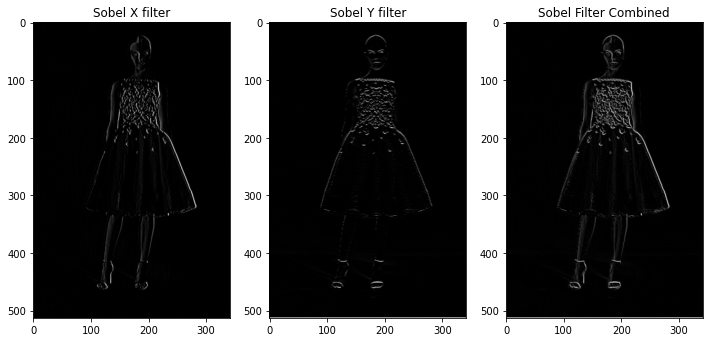

In [59]:
fig, axs = plt.subplots(1, 3,figsize=(12,12))
axs[0].imshow(SobelX,cmap='gray')
axs[0].title.set_text('Sobel X filter')
axs[1].imshow(SobelY,cmap='gray')
axs[1].title.set_text('Sobel Y filter')
axs[2].imshow(Sobel,cmap='gray')
axs[2].title.set_text('Sobel Filter Combined')

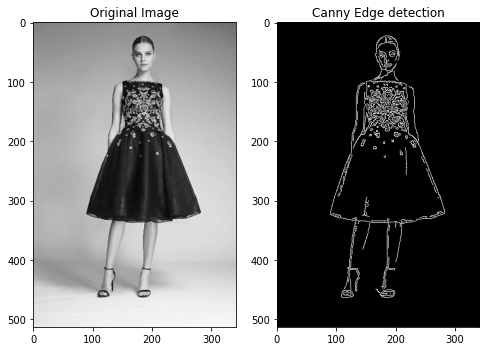

In [60]:
cannyGirl = cv2.Canny(girl, 100, 200)
fig, axs = plt.subplots(1, 2,figsize=(8,8))
axs[0].imshow(girl, cmap='gray')
axs[0].title.set_text('Original Image',)
axs[1].imshow(cannyGirl, cmap='gray')
axs[1].title.set_text('Canny Edge detection',)

### Observations:
1. The 3 filters look relatively the same with the Robert Filter being slight less lighter than Prewitt and Sobel Filters. The Laplacian filters are on comparison much lighter than the other filters.
2. We can compare all these values to the canny edge detection which does a better job on fiding the edges as there is no noise.

## <b>Part 4</b>

In [61]:
## 5x5 Filters

#Prewitt filter
MxP5 = [[-1,-1,0,1,1],
       [-1,-1,0,1,1],
       [-1,-1,0,1,1],
       [-1,-1,0,1,1],
       [-1,-1,0,1,1]]
MyP5 = [[1,1,1,1,1],
       [1,1,1,1,1],
       [0,0,0,0,0],
       [-1,-1,-1,-1,-1],
       [-1,-1,-1,-1,-1]]
#Sobel filter
MxS5 = [[-1,-2,0,2,1],
       [-4,-8,0,8,4],
       [-6,-12,0,12,6],
       [-4,-8,0,8,4],
       [-1,-2,0,2,1]]
MyS5 = [[1,4,6,4,1],
       [2,8,12,8,2],
       [0,0,0,0,0],
       [-2,-8,-12,-8,-2],
       [-1,-4,-6,-4,-1]]

In [62]:
PrewittX5 = filt(girl,MxP5,5)
PrewittY5 = filt(girl,MyP5,5)
Prewitt5 = np.int64(np.sqrt(PrewittX5**2 + PrewittY5**2))
SobelX5 = filt(girl,MxS5,5)
SobelY5 = filt(girl,MyS5,5)
Sobel5 = np.int64(np.sqrt(SobelX5**2 + SobelY5**2))

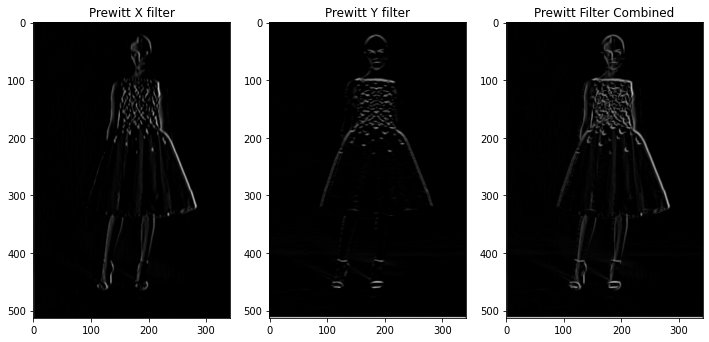

In [63]:
fig, axs = plt.subplots(1, 3,figsize=(12,12))
axs[0].imshow(PrewittX5,cmap='gray')
axs[0].title.set_text('Prewitt X filter')
axs[1].imshow(PrewittY5,cmap='gray')
axs[1].title.set_text('Prewitt Y filter')
axs[2].imshow(Prewitt5,cmap='gray')
axs[2].title.set_text('Prewitt Filter Combined')

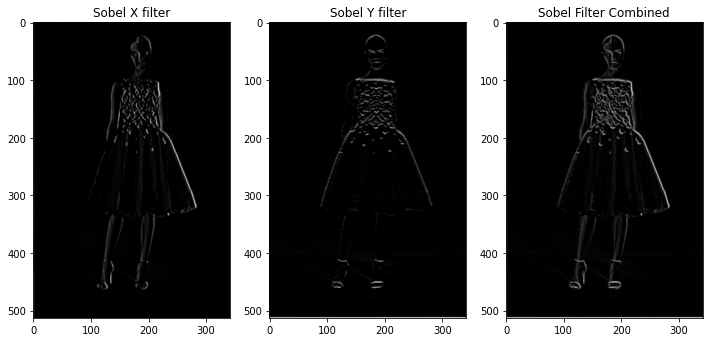

In [17]:
fig, axs = plt.subplots(1, 3,figsize=(12,12))
axs[0].imshow(SobelX5,cmap='gray')
axs[0].title.set_text('Sobel X filter')
axs[1].imshow(SobelY5,cmap='gray')
axs[1].title.set_text('Sobel Y filter')
axs[2].imshow(Sobel5,cmap='gray')
axs[2].title.set_text('Sobel Filter Combined')

### <b>Part 4</b>

### Observations
1. On comparison of 3x3 and 5x5 filters, the 5x5 filters edges are more thicker relative to the 3x3 filter's outputs

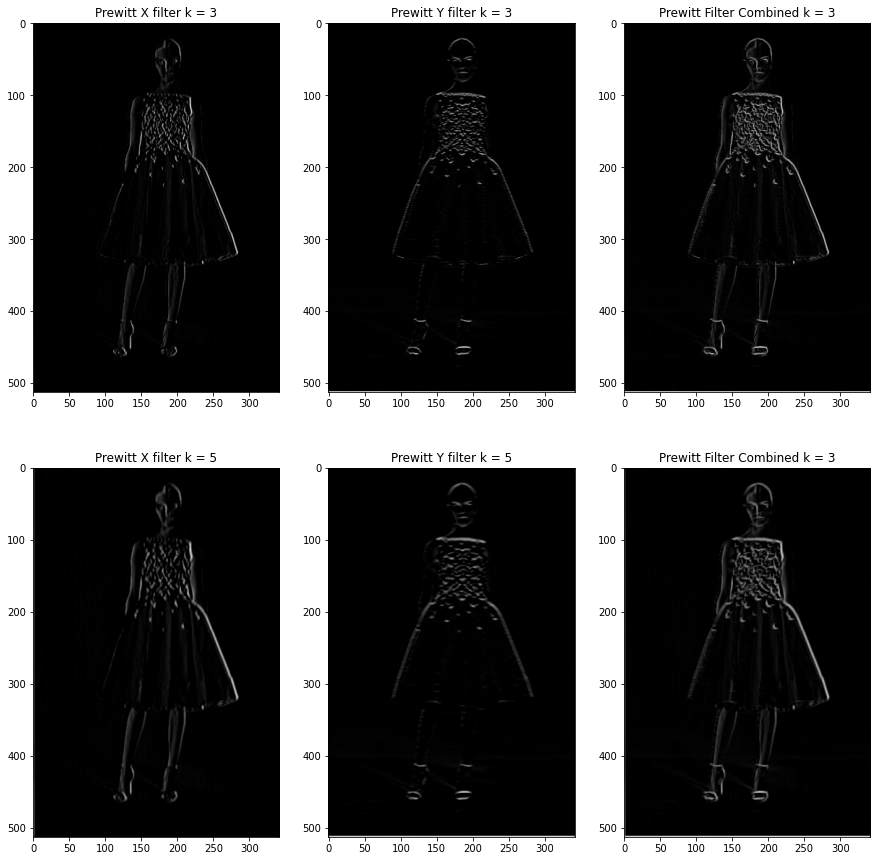

In [64]:
#Prewitt Filter Comparison
fig, axs = plt.subplots(2, 3,figsize=(15,15))
axs[0][0].imshow(PrewittX,cmap='gray')
axs[0][0].title.set_text('Prewitt X filter k = 3')
axs[0][1].imshow(PrewittY,cmap='gray')
axs[0][1].title.set_text('Prewitt Y filter k = 3')
axs[0][2].imshow(Prewitt,cmap='gray')
axs[0][2].title.set_text('Prewitt Filter Combined k = 3')
axs[1][0].imshow(PrewittX5,cmap='gray')
axs[1][0].title.set_text('Prewitt X filter k = 5')
axs[1][1].imshow(PrewittY5,cmap='gray')
axs[1][1].title.set_text('Prewitt Y filter k = 5')
axs[1][2].imshow(Prewitt5,cmap='gray')
axs[1][2].title.set_text('Prewitt Filter Combined k = 5')

### <b>Part 5</b>

In [67]:
#Load image
girlN1 = cv2.imread("images/girlNoisy1.jpg",0)
girlN2 = cv2.imread("images/girlNoisy2.jpg",0)

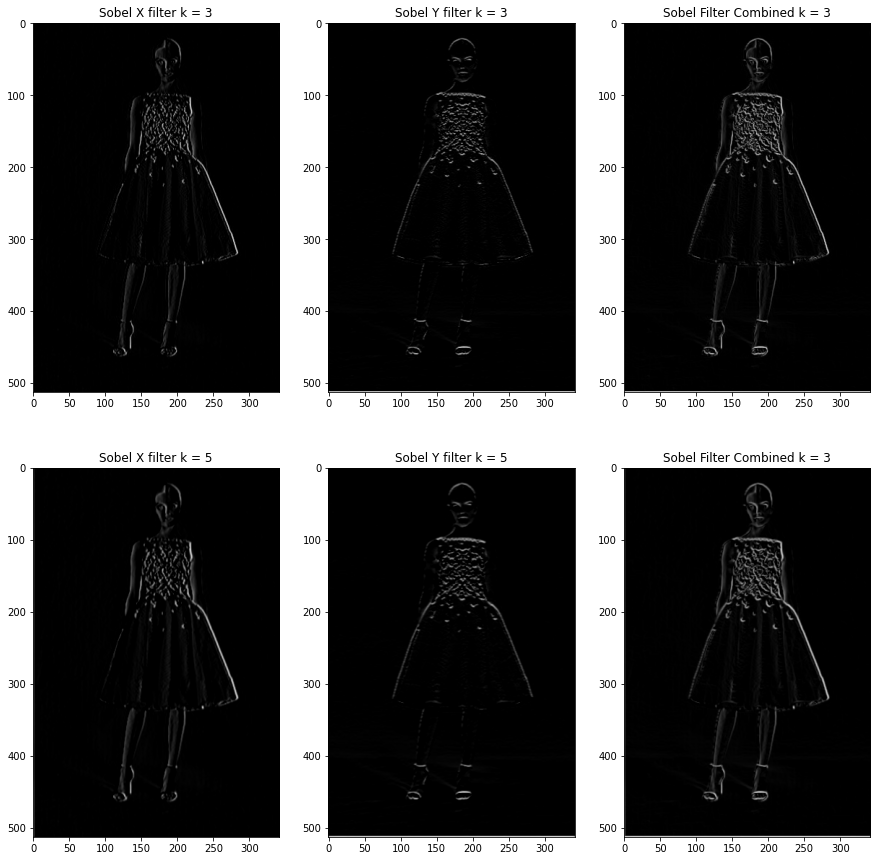

In [65]:
fig, axs = plt.subplots(2, 3,figsize=(15,15))
axs[0][0].imshow(SobelX,cmap='gray')
axs[0][0].title.set_text('Sobel X filter k = 3')
axs[0][1].imshow(SobelY,cmap='gray')
axs[0][1].title.set_text('Sobel Y filter k = 3')
axs[0][2].imshow(Sobel,cmap='gray')
axs[0][2].title.set_text('Sobel Filter Combined k = 3')
axs[1][0].imshow(SobelX5,cmap='gray')
axs[1][0].title.set_text('Sobel X filter k = 5')
axs[1][1].imshow(SobelY5,cmap='gray')
axs[1][1].title.set_text('Sobel Y filter k = 5')
axs[1][2].imshow(Sobel5,cmap='gray')
axs[1][2].title.set_text('Sobel Filter Combined k = 5')

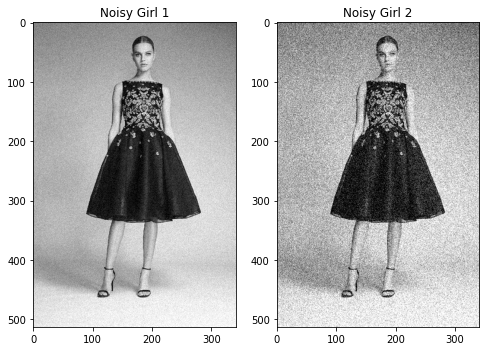

In [69]:
fig, axs = plt.subplots(1, 2,figsize=(8,8))
axs[0].imshow(girlN1, cmap='gray')
axs[0].title.set_text('Noisy Girl 1')
axs[1].imshow(girlN2, cmap='gray')
axs[1].title.set_text('Noisy Girl 2')

Canny Detection

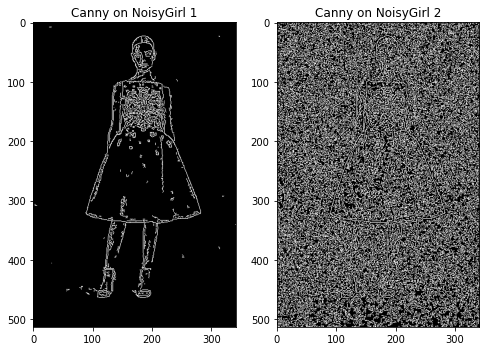

In [70]:
cannyGirlN1 = cv2.Canny(girlN1, 100, 200)
cannyGirlN2 = cv2.Canny(girlN2, 100, 200)
fig, axs = plt.subplots(1, 2,figsize=(8,8))
axs[0].imshow(cannyGirlN1, cmap='gray')
axs[0].title.set_text('Canny on NoisyGirl 1')
axs[1].imshow(cannyGirlN2, cmap='gray')
axs[1].title.set_text('Canny on NoisyGirl 2')

Rest of the filters for noisy girl-1

In [71]:
#3x3 Filters
PrewittX1 = filt(girlN1,MxP,3)
PrewittY1 = filt(girlN1,MyP,3)
Prewitt1 = np.int64(np.sqrt(PrewittX1**2 + PrewittY1**2))
SobelX1 = filt(girlN1,MxS,3)
SobelY1 = filt(girlN1,MyS,3)
Sobel1 = np.int64(np.sqrt(SobelX1**2 + SobelY1**2))
RobertX1 = filt(girlN1,MxP,2)
RobertY1 = filt(girlN1,MyP,2)
Robert1 = np.int64(np.sqrt(RobertX1**2 + RobertY1**2))
Laplacian11 = np.abs(filt(girlN1,ML1,3))
Laplacian21 = np.abs(filt(girlN1,ML2,3))
#5x5 Filters
PrewittX51 = filt(girlN1,MxP5,5)
PrewittY51 = filt(girlN1,MyP5,5)
Prewitt51 = np.int64(np.sqrt(PrewittX51**2 + PrewittY51**2))
SobelX51 = filt(girlN1,MxS5,5)
SobelY51 = filt(girlN1,MyS5,5)
Sobel51 = np.int64(np.sqrt(SobelX51**2 + SobelY51**2))

Rest of the filters for noisy girl-2

In [72]:
#3x3 Filters
PrewittX2 = filt(girlN2,MxP,3)
PrewittY2 = filt(girlN2,MyP,3)
Prewitt2 = np.int64(np.sqrt(PrewittX2**2 + PrewittY2**2))
SobelX2 = filt(girlN2,MxS,3)
SobelY2 = filt(girlN2,MyS,3)
Sobel2 = np.int64(np.sqrt(SobelX2**2 + SobelY2**2))
RobertX2 = filt(girlN2,MxP,2)
RobertY2 = filt(girlN2,MyP,2)
Robert2 = np.int64(np.sqrt(RobertX2**2 + RobertY2**2))
Laplacian12 = np.abs(filt(girlN2,ML1,3))
Laplacian22 = np.abs(filt(girlN2,ML2,3))
#5x5 Filters
PrewittX52 = filt(girlN2,MxP5,5)
PrewittY52 = filt(girlN2,MyP5,5)
Prewitt52 = np.int64(np.sqrt(PrewittX52**2 + PrewittY52**2))
SobelX52 = filt(girlN2,MxS5,5)
SobelY52 = filt(girlN2,MyS5,5)
Sobel52 = np.int64(np.sqrt(SobelX52**2 + SobelY52**2))

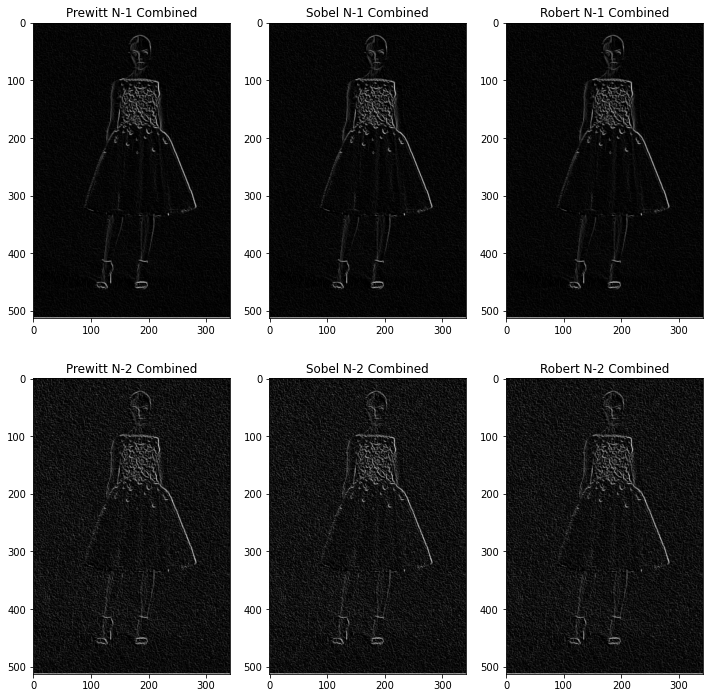

In [73]:
fig, axs = plt.subplots(2, 3,figsize=(12,12))
axs[0][0].imshow(Prewitt1,cmap='gray')
axs[0][0].title.set_text('Prewitt N-1 Combined')
axs[0][1].imshow(Sobel1,cmap='gray')
axs[0][1].title.set_text('Sobel N-1 Combined')
axs[0][2].imshow(Robert1,cmap='gray')
axs[0][2].title.set_text('Robert N-1 Combined')
axs[1][0].imshow(Prewitt2,cmap='gray')
axs[1][0].title.set_text('Prewitt N-2 Combined')
axs[1][1].imshow(Sobel2,cmap='gray')
axs[1][1].title.set_text('Sobel N-2 Combined')
axs[1][2].imshow(Robert2,cmap='gray')
axs[1][2].title.set_text('Robert N-2 Combined')

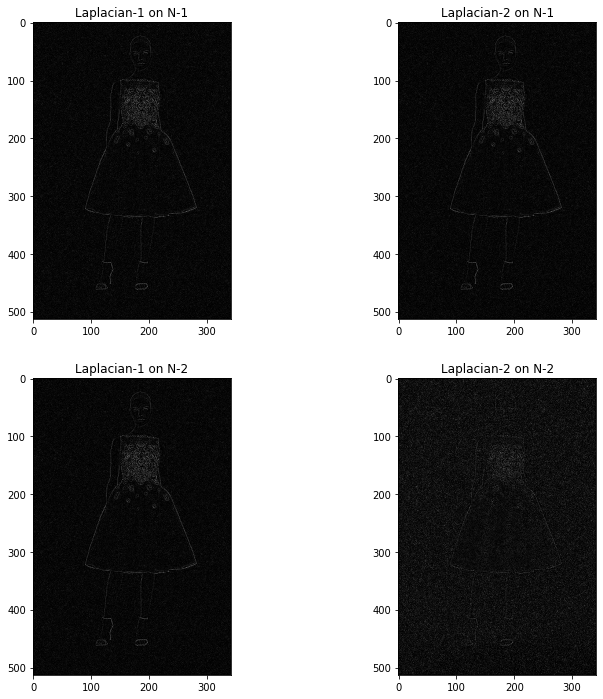

In [74]:
fig, axs = plt.subplots(2, 2,figsize=(12,12))
axs[0][0].imshow(Laplacian11,cmap='gray')
axs[0][0].title.set_text('Laplacian-1 on N-1')
axs[0][1].imshow(Laplacian21,cmap='gray')
axs[0][1].title.set_text('Laplacian-2 on N-1')
axs[1][0].imshow(Laplacian21,cmap='gray')
axs[1][0].title.set_text('Laplacian-1 on N-2')
axs[1][1].imshow(Laplacian22,cmap='gray')
axs[1][1].title.set_text('Laplacian-2 on N-2')

### Observation
1. Canny edge detection fails completely on the second image that has a higher gaussian noise. The other filters were atleast able to detect the edges to an extent. The Laplacian filter-1 works better than the LF-2 on the high noisy version of the pic